# Classifiers

In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## KNN

### Admission dataset

In [2]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=12345)
print(f'{x1_train.shape=}, {y1_train.shape=}')

x1_train.shape=(70, 2), y1_train.shape=(70,)


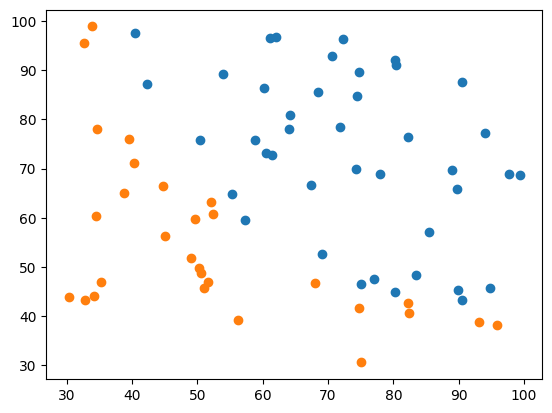

In [3]:
true_indices = np.where(y1_train == 1)[0]
false_indices = np.where(y1_train == 0)[0]

x1_true = x1_train[true_indices, :]
x1_false = x1_train[false_indices, :]

plt.scatter(x1_true[:,0], x1_true[:,1])
plt.scatter(x1_false[:,0],x1_false[:,1])
plt.show()

In [4]:
def classify(X, y, example, k):
  '''
  :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
  :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
  :param example: wektor cech danego przykładu postaci ndarray (n, )
  :param k: parametr k algorytmu knn
  :return: predykcja klasy przykładu. 0 lub 1
  '''
  
  distances = [] # it contains tuples (distance, class)
  m, _ = X.shape
  # counting distances
  for i in range(m):
    diff = X[i, :] - example
    diff2 = np.square(diff)
    distances.append((np.squeeze(np.sum(diff2)), y[i]))
  # sorting distances
  distances.sort(key=lambda x: x[0])
  
  classifier = 1 if np.sum([x[1] for x in distances[:k]]) / k >= 0.5 else 0 

  return classifier

In [5]:
k = 3
classify(x1_train, y1_train, y1_test[0], k)

0

In [6]:
def get_model_predictions(X, y, x_test, y_test, k):
  m, _ = x_test.shape

  preds = np.zeros(y_test.shape)
  for i in range(m):
    preds[i] = classify(X, y, x_test[i, :], k)

  return preds

In [7]:
def get_model_accuracy(X, y, x_test, y_test, k):
  m, _ = x_test.shape
  preds = get_model_predictions(X, y, x_test, y_test, k)

  mistake_ratio = np.sum(np.abs(preds - y_test)) / m
  return 1 - mistake_ratio

In [8]:
# method test, for training data as test data and k=1 accuracy should be 1.0
get_model_accuracy(x1_train, y1_train, x1_train, y1_train, 1)

np.float64(1.0)

In [9]:
list_k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
test_accuracies = []
train_accuracies = []

for k in list_k:
  train_acc = get_model_accuracy(x1_train, y1_train, x1_train, y1_train, k)
  test_acc = get_model_accuracy(x1_train, y1_train, x1_test, y1_test, k)
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)

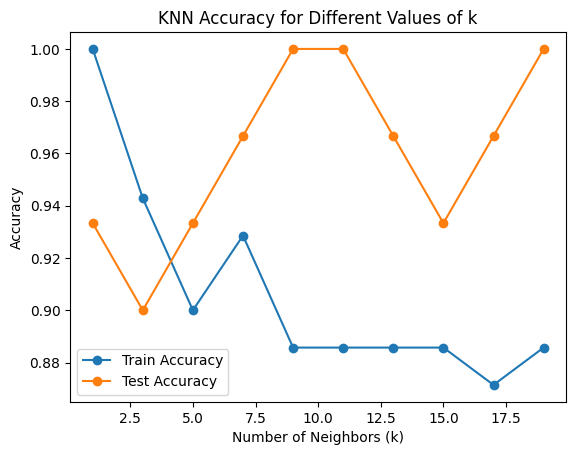

In [10]:
plt.plot(list_k, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(list_k, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Number of Neighbors (k)")
# plt.ylim((0, 1))
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different Values of k")
plt.legend()
plt.show()

In [11]:
def get_decision_border_plot(ax, x_train, y_train, x_test, y_test, k_):
  # setup plot
  ax.set_title(f'k={k_}')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')

  # prepare data for contour plot
  x1_res = 50
  x2_res = 50
  x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
  x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
  x1x1, x2x2 = np.meshgrid(x1, x2)
  x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
  labels_space = np.zeros((x1_res, x2_res))
  for row_idx in range(x2_res):
    for col_idx in range(x1_res):
        example = np.array([x1[col_idx], x2[row_idx]])
        pred = classify(x_train, y_train, example, k_)
        labels_space[row_idx, col_idx] = pred
  # plot decision boundary
  ax.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

  # plot training set
  ax.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
  ax.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

  # plot test set
  ax.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
  ax.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

  ax.legend(['train_0', 'train_1', 'test_0', 'test_1'])

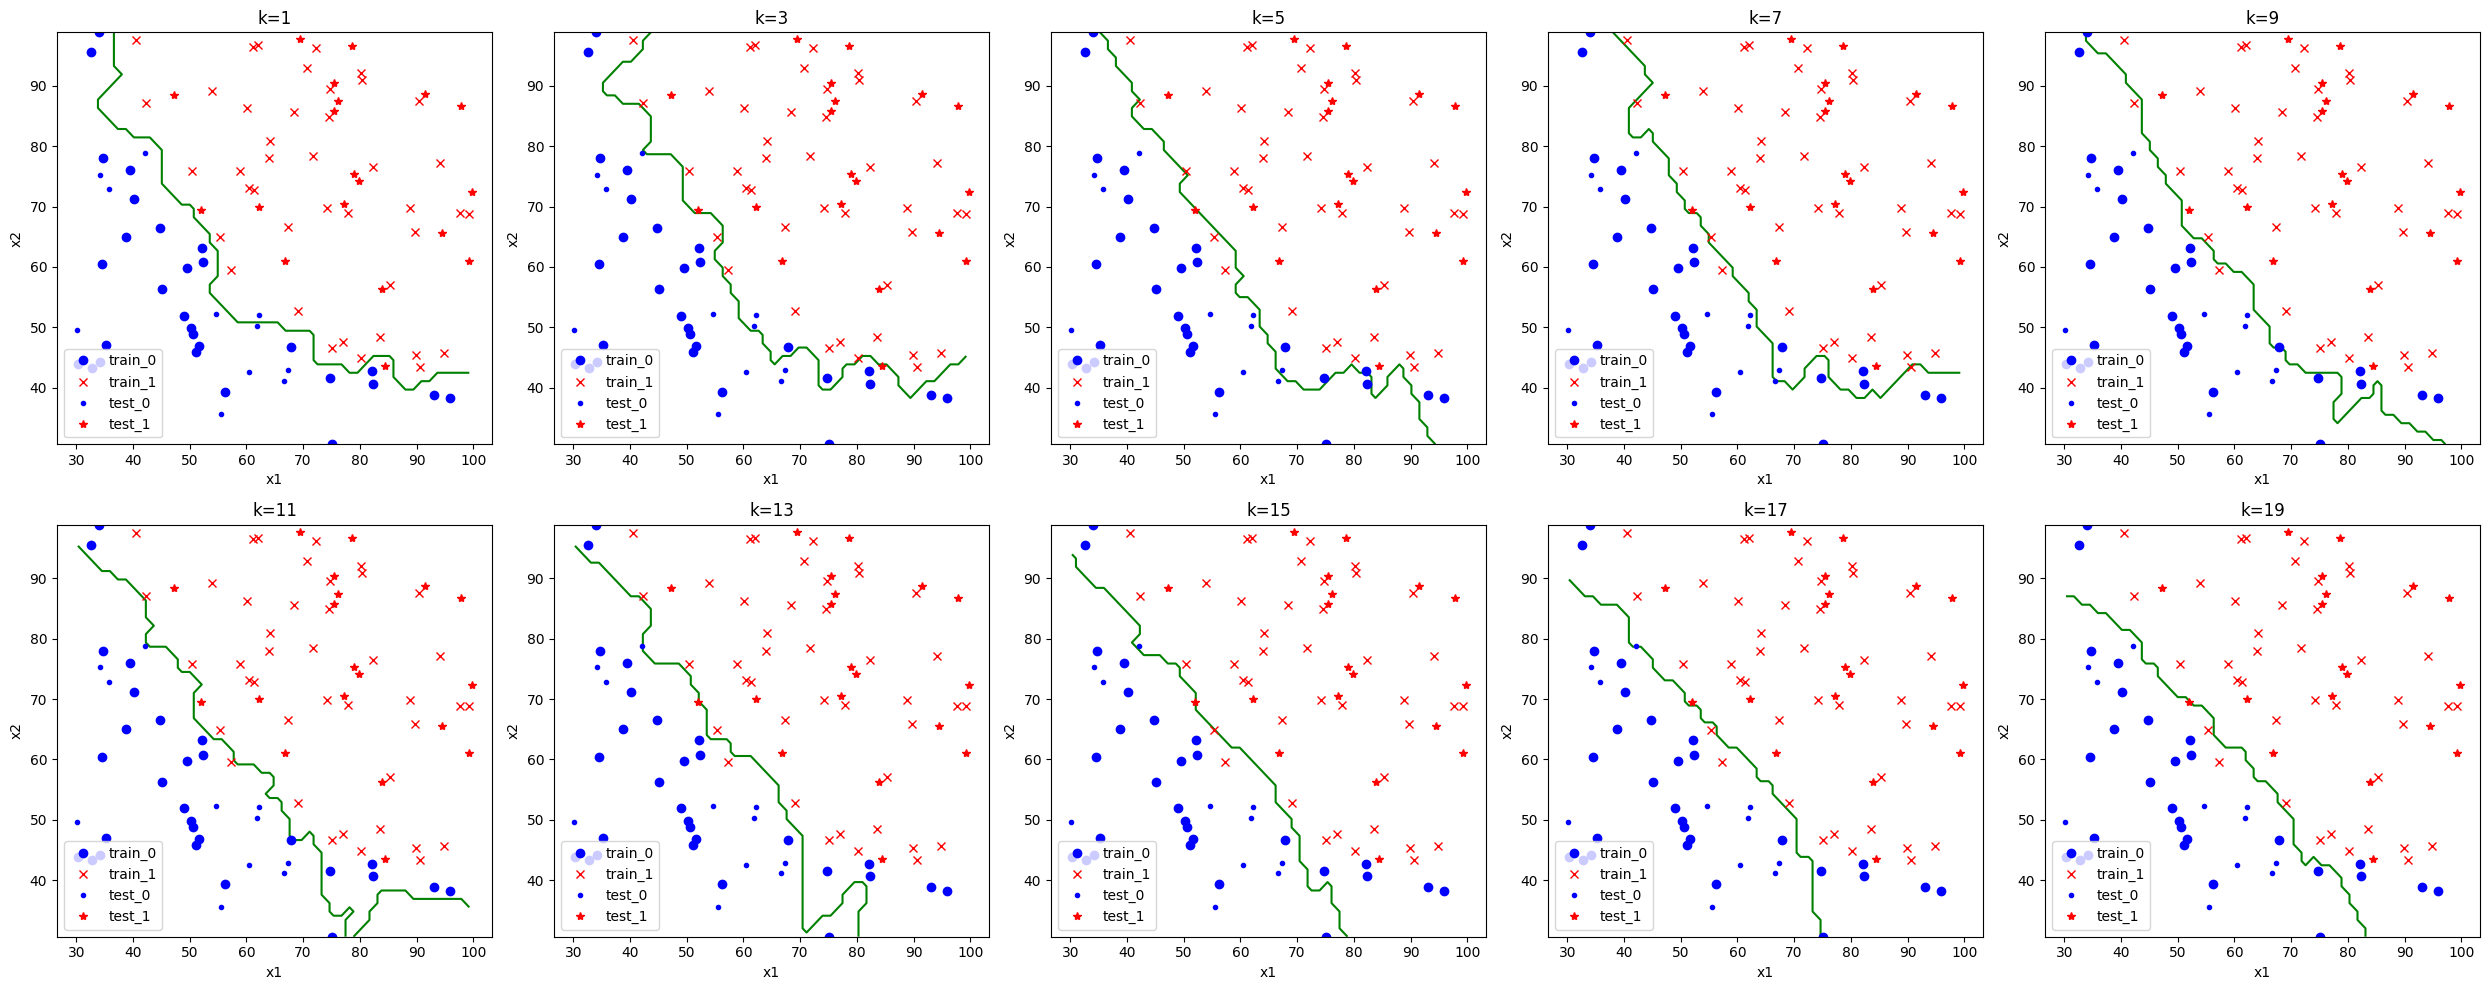

In [12]:
n = len(list_k)
cols = 5
rows = n // cols
f, ax = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# flatten the array
ax = ax.ravel()

# Plot each k value
for i, k in enumerate(list_k):
  get_decision_border_plot(ax[i], x1_train, y1_train, x1_test, y1_test, k)

plt.tight_layout()
plt.show()

In [13]:
# k = 1 seems to be best fit
best_k = 1

In [14]:
get_model_accuracy(x1_train, y1_train, x1_test, y1_test, best_k)

np.float64(0.9333333333333333)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
 
knn_classifier = KNeighborsClassifier(best_k)
knn_classifier.fit(x1_train, y1_train)
y_pred = knn_classifier.predict(x1_test)

In [16]:
def get_decision_border_plot_sl(ax, x_train, y_train, x_test, y_test, k_):
  # setup plot
  ax.set_title(f'k={k_}')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')

  # prepare data for contour plot
  x1_res = 50
  x2_res = 50
  x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
  x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
  x1x1, x2x2 = np.meshgrid(x1, x2)
  x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]

  # Train the KNN classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=k_)
  knn_classifier.fit(x_train, y_train)

  # Predict on the mesh grid points to plot decision boundary
  labels_space = knn_classifier.predict(x1x2_range_comb).reshape(x1x1.shape)

  # Plot decision boundary
  ax.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

  # Plot training set
  ax.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo', label='train_0')
  ax.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx', label='train_1')

  # Plot test set
  ax.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.', label='test_0')
  ax.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*', label='test_1')

  ax.legend(['train_0', 'train_1', 'test_0', 'test_1'])

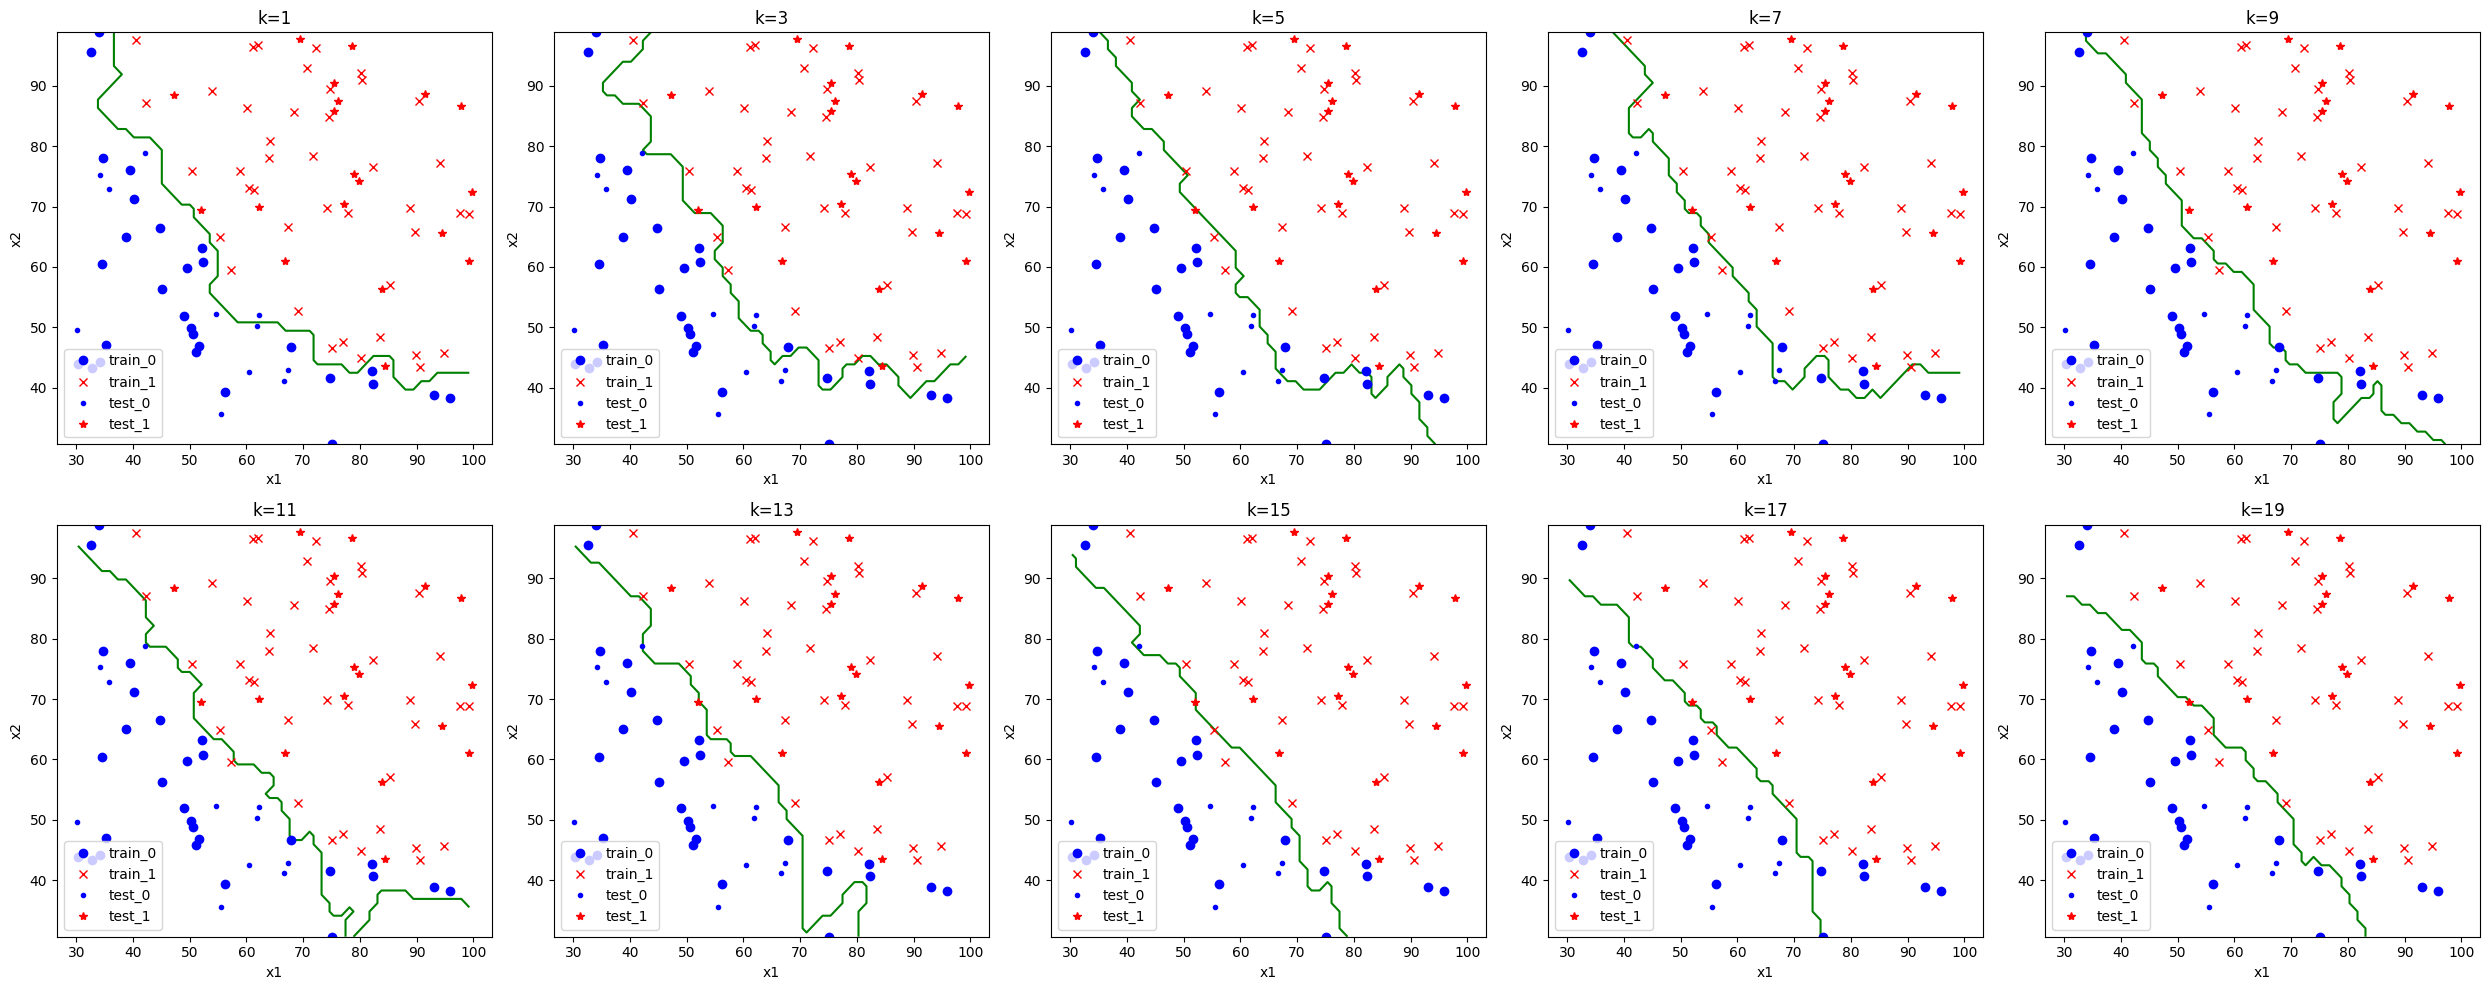

In [17]:
n = len(list_k)
cols = 5
rows = n // cols
f, ax = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# flatten the array
ax = ax.ravel()

# Plot each k value
for i, k in enumerate(list_k):
  get_decision_border_plot_sl(ax[i], x1_train, y1_train, x1_test, y1_test, k)

plt.tight_layout()
plt.show()

In [18]:
best_k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(x1_train, y1_train)
y_pred = knn_classifier.predict(x1_test)

cm = confusion_matrix(y1_test,y_pred)
print(cm)
print(classification_report(y1_test,y_pred))

[[10  1]
 [ 1 18]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       0.95      0.95      0.95        19

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Digits dataset

In [19]:
from sklearn.datasets import load_digits
 
data = load_digits()
y2 = data['target']
x2 = data['data']

In [20]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=12345)


In [21]:
best_k = None
best_acc = 0
for k in list_k:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x2_train, y2_train)
  y_pred = classifier.predict(x2_test)
  acc = accuracy_score(y2_test, y_pred)
  # print(f"k={k}, acc={acc}")
  if acc > best_acc:
    best_acc = acc
    best_k = k

print(best_k)

1


In [22]:
classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(x2_train, y2_train)
y_pred = classifier.predict(x2_test)
print(confusion_matrix(y2_test, y_pred))
print("\n")
print(classification_report(y2_test, y_pred))

[[57  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0 67  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 63  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  1  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 55]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        67
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        44
           8       1.00      0.98      0.99        57
           9       1.00      1.00      1.00        55

    accuracy                           1.00       540
   macro avg     

## Decision Trees

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
def get_decision_border_plot_decision_tree(ax, x_train, y_train, x_test, y_test, lvl):
  # setup plot
  ax.set_title(f'lvl={lvl}')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')

  # prepare data for contour plot
  x1_res = 50
  x2_res = 50
  x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
  x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
  x1x1, x2x2 = np.meshgrid(x1, x2)
  x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]

  # Train the KNN classifier
  knn_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
  knn_classifier.fit(x_train, y_train)

  # Predict on the mesh grid points to plot decision boundary
  labels_space = knn_classifier.predict(x1x2_range_comb).reshape(x1x1.shape)

  # Plot decision boundary
  ax.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

  # Plot training set
  ax.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo', label='train_0')
  ax.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx', label='train_1')

  # Plot test set
  ax.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.', label='test_0')
  ax.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*', label='test_1')

  ax.legend(['train_0', 'train_1', 'test_0', 'test_1'])

level: 1, test acc: 0.700, train_acc: 0.843
level: 2, test acc: 0.833, train_acc: 0.943
level: 3, test acc: 0.833, train_acc: 0.986
level: 4, test acc: 0.833, train_acc: 1.000
level: 5, test acc: 0.833, train_acc: 1.000


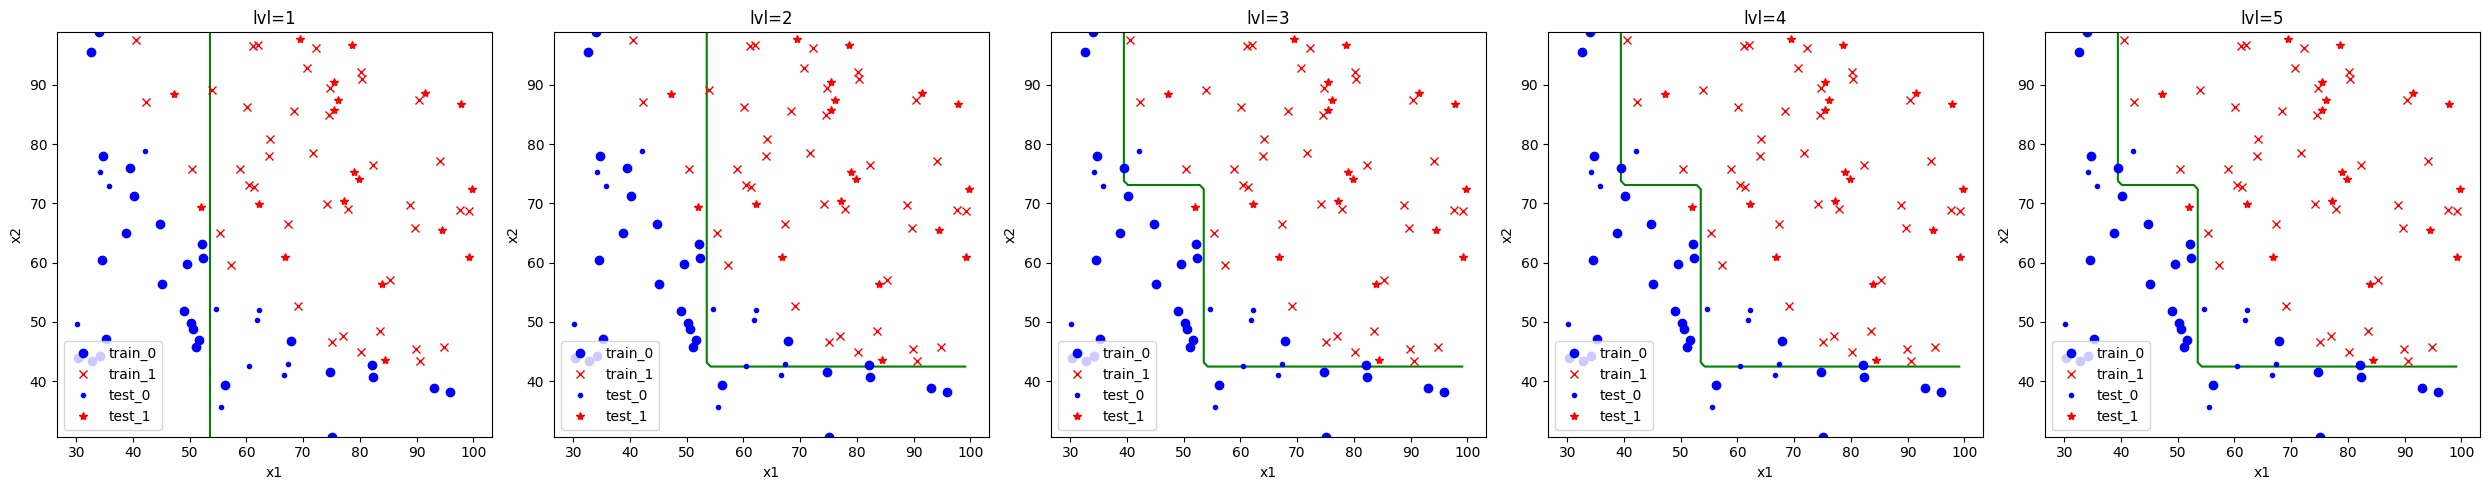

In [25]:
lvls = [x+1 for x in range(5)]

n = len(lvls)
cols = 5
rows = n // cols
f, ax = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# flatten the array
ax = ax.ravel()

for i, lvl in enumerate(lvls):
  classifier = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
  classifier.fit(x1_train, y1_train)
  y_pred = classifier.predict(x1_test)
  acc = accuracy_score(y1_test, y_pred)
  y_pred_train = classifier.predict(x1_train)
  train_acc = accuracy_score(y1_train, y_pred_train)
  get_decision_border_plot_decision_tree(ax[i], x1_train, y1_train, x1_test, y1_test, lvl)
  print(f"level: {lvl}, test acc: {acc:.3f}, train_acc: {train_acc:.3f}")

plt.tight_layout()
plt.show()